## 第一个机器学习算法  ——  K-means clustering

### Driven by two examples:
1.为中国省会设置能源中心

2.新闻自动进行归类

K-means 聚类是一种常用的无监督学习算法，用于将一组数据点分成 K 个类别。它的主要思想是将数据点分成 K 个簇（cluster），使得同一簇内的数据点之间的相似度尽可能高，而不同簇之间的相似度尽可能低。K-means 算法的流程如下：

1. 随机选取 K 个点作为初始的质心（centroids）

2. 将每个数据点分配到离它最近的质心所在的簇。

3. 根据每个簇内的数据点重新计算质心的位置。

4. 重复步骤 2 和步骤 3 直到质心的位置不再发生变化，或者达到了预定的迭代次数。

K-means 算法的核心在于如何计算数据点之间的相似度和质心的位置。通常，我们可以使用欧几里得距离（Euclidean distance）来计算数据点之间的距离，即：

$$distance(x_i,x_j) = \sqrt{\sum_{k = 1}^{d}(x_{ik} - x_{jk})^2} $$

其中 $x_i,x_j$ 表示两个数据点，d 表示数据点的维数。欧几里得距离表示两个数据点之间在空间中的距离，它的值越小，表示两个数据点之间越相似。K-means 算法中的质心通常是每个簇内数据点的均值，即：

$$c_k = \frac{1}{n_k}\sum_{X\in{S_k}}X$$

其中 $c_k$ 表示第 k 个簇的质心，$S_k$ 表示第 k 个簇内数据点的集合，$n_k$ 表示第 k 个簇内数据点的数量。质心的位置表示簇内数据点的中心，它的位置会随着数据点的分配而不断更新。K-means 算法的结果是将数据点分成 k 个簇，并且得到每个簇的质心。我们可以使用 K-means 聚类算法来对数据进行聚类分析，例如将用户分成不同的群体，将商品分成不同的类别等。

## 我们要给中国的省会们设置5个核心能源点

In [10]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

## 正则表达式

把坐标转化为向量，在处理字符特征提取时非常重要

In [11]:
import re

In [3]:
# 如此可直接看使用方法及源代码
??re

In [12]:
test_string = "{name:'乌鲁木齐', geoCoord:[87.68, 43.77]}"

In [13]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")
pattern.findall(test_string)

[('乌鲁木齐', '87.68', '43.77')]

In [14]:
city_location = {}

In [15]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    
    if not city_info: continue
        
    city_name, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city_name] = [long, lat]

In [16]:
city_location

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '海口': [110.35, 20.02],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '台湾': [121.3, 25.03],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '西藏': [91.11, 29.97],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

## 如果我们要考虑建造能源中心，我们是不是要考虑城市的距离

1.球面地理距离：GeoDistant

2.余弦距离：Cosine Distance （两个向量之间的夹角越小，表示余弦距离越近，两个向量的尾端点越近）

3.欧几里得距离：Eucliean Distance (两点之间的距离)

4.曼哈顿距离：Manhattan distance （城市距离，也称街区距离，它表示在规划网格上从一个点到另一个点的距离，即沿着网格线行进的距离之和。）

## 欧几里得距离

欧几里得距离表示如下：$$distance(x_{(x1,y1)}, y_{(x2,y2)}) = \sqrt{(x1 - x2)^2 + (y1 - y2)^2}$$

## 余弦距离
余弦距离（cosine distance）是一种常用于衡量向量之间相似度的方法，它衡量的是两个向量夹角的余弦值。余弦距离越接近于 1，表示两个向量越相似；越接近于 0，表示两个向量越不相似。

余弦距离的计算公式如下：$$cosine_distance(v1, v2) = 1 - \frac{v1 * v2}{||v1|| * ||v2||} $$

余弦距离的取值范围是【0，1】，越接近于 1 表示越相似，越接近于 0 表示越不相似。当两个向量正交时，余弦距离为 0；当两个向量方向相同时，余弦距离为 1；当两个向量方向相反时，余弦距离为 -1。

需要注意的是，余弦距离只衡量向量之间的方向相似度，而不考虑它们的长度或大小。如果两个向量的长度不同，那么它们之间的余弦距离可能会偏低，即使它们的方向相似。因此，在使用余弦距离进行相似度计算时，通常需要对向量进行归一化处理，使它们的长度相同。

||v|| 即表示向量的范数，可以用来衡量向量的大小或长度。如果一个向量的范数为 1，那么它就是一个单位向量。在机器学习中，常常需要对向量进行归一化（normalization）处理，使它们的范数变为 1，这样可以方便地比较它们之间的相似度。

如果 v(x,y)，那么如下：$$||v|| = \sqrt{x^2 + y^2}$$

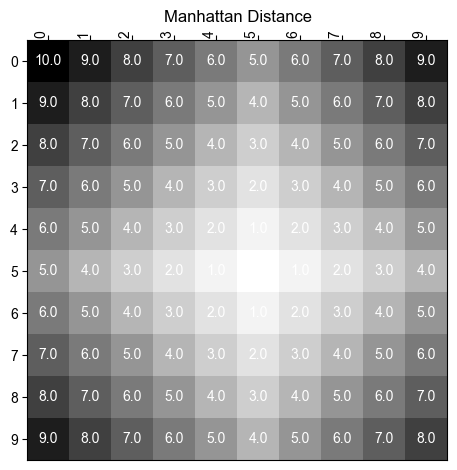

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 生成曼哈顿距离矩阵
n = 10
manhattan = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        manhattan[i, j] = abs(i - n//2) + abs(j - n//2)

# 绘制曼哈顿距离图形
fig, ax = plt.subplots()
im = ax.imshow(manhattan, cmap='Greys')
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(np.arange(n))
ax.set_yticklabels(np.arange(n))
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, manhattan[i, j],
                       ha="center", va="center", color="w")
ax.set_title("Manhattan Distance")
fig.tight_layout()
plt.show()

In [17]:
import math

In [18]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [19]:
geo_distance(city_location['上海'], city_location['杭州'])

163.0760821403945

In [20]:
# 支持中文
from pylab import mpl
import matplotlib.pyplot as plt

In [21]:
mpl.rcParams['font.sans-serif'] = 'Arial Unicode MS'
#mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号‘-’显示为方块的问题
#plt.rcParams['font.family'] = ['Arial Unicode MS']  # 设置中文字体为 Arial Unicode MS

In [22]:
import networkx as nx

In [23]:
city_graph = nx.Graph()

In [24]:
city_graph.add_nodes_from(list(city_location.keys()))

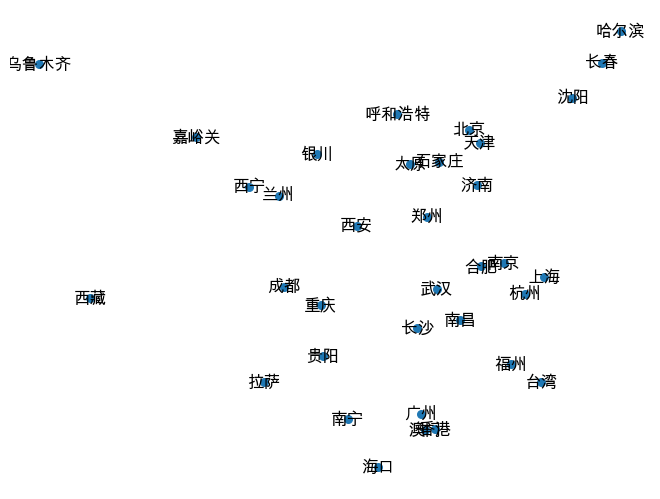

In [25]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

## 找到合理的能源中心

In [29]:
Xs = np.array(list(city_location.values()))

In [30]:
# 取的全国省会的经纬度
Xs

array([[103.73,  36.03],
       [ 98.17,  39.47],
       [101.74,  36.56],
       [104.06,  30.67],
       [114.48,  38.03],
       [102.73,  25.04],
       [106.71,  26.57],
       [114.31,  30.52],
       [113.65,  34.76],
       [117.  ,  36.65],
       [118.78,  32.04],
       [117.27,  31.86],
       [120.19,  30.26],
       [115.89,  28.68],
       [119.3 ,  26.08],
       [113.23,  23.16],
       [113.  ,  28.21],
       [110.35,  20.02],
       [123.38,  41.8 ],
       [125.35,  43.88],
       [126.63,  45.75],
       [112.53,  37.87],
       [108.95,  34.27],
       [121.3 ,  25.03],
       [116.46,  39.92],
       [121.48,  31.22],
       [106.54,  29.59],
       [117.2 ,  39.13],
       [111.65,  40.82],
       [108.33,  22.84],
       [ 91.11,  29.97],
       [106.27,  38.47],
       [ 87.68,  43.77],
       [114.17,  22.28],
       [113.54,  22.19]])

In [31]:
import random
from collections import defaultdict
def get_random_center(all_x, all_y):
    return random.uniform(min(all_x), max(all_x)), random.uniform(min(all_y), max(all_y))

all_x = Xs[:, 0]
all_y = Xs[:, 1]

K = 5
threshold = 3

centers = {'{}'.format(i + 1):get_random_center(all_x, all_y) for i in range(K)}

the_first_center = {k:v for k, v in centers.items()}
changed = True

while changed:
    closet_points = defaultdict(list)

    for x, y in zip(all_x, all_y):

        closet_c, closet_dis = min([(k, geo_distance((x,y), centers[k])) for k in centers], 
                                       key=lambda t:t[1])
        closet_points[closet_c].append([x,y])
            #print('for {}, {} the closet center is {}'.format(x, y, closet_c))
    changed = False
    for c in closet_points:
        former_center = centers[c]

        neigbors_belong_to_c = closet_points[c]

        neigbors_center = np.mean(neigbors_belong_to_c, axis=0)

        if geo_distance(neigbors_center, former_center) > threshold:
            print('Updated:{} center'.format(c))
            centers[c] = neigbors_center #赋值新的中心点
            changed = True

Updated:2 center
Updated:4 center
Updated:1 center
Updated:5 center
Updated:3 center
Updated:1 center
Updated:5 center
Updated:2 center
Updated:3 center
Updated:5 center
Updated:2 center
Updated:5 center
Updated:2 center
Updated:1 center
Updated:2 center


In [32]:
closet_points

defaultdict(list,
            {'1': [[103.73, 36.03],
              [101.74, 36.56],
              [104.06, 30.67],
              [102.73, 25.04],
              [106.71, 26.57],
              [106.54, 29.59],
              [91.11, 29.97]],
             '4': [[98.17, 39.47], [87.68, 43.77]],
             '5': [[114.48, 38.03],
              [114.31, 30.52],
              [113.65, 34.76],
              [117.0, 36.65],
              [118.78, 32.04],
              [117.27, 31.86],
              [120.19, 30.26],
              [112.53, 37.87],
              [108.95, 34.27],
              [116.46, 39.92],
              [121.48, 31.22],
              [117.2, 39.13],
              [111.65, 40.82],
              [106.27, 38.47]],
             '2': [[115.89, 28.68],
              [119.3, 26.08],
              [113.23, 23.16],
              [113.0, 28.21],
              [110.35, 20.02],
              [121.3, 25.03],
              [108.33, 22.84],
              [114.17, 22.28],
              [113.5

In [33]:
for x,y in centers.values():
    print(x,y)

102.37428571428572 30.632857142857144
114.34555555555555 24.276666666666667
125.12 43.81
92.92500000000001 41.620000000000005
115.01571428571431 35.41571428571428


## example (x,y)坐标拆分

In [34]:
[[1,2], [-1,-2]]

[[1, 2], [-1, -2]]

In [35]:
for e in zip([1,2], [-1,-2]):
    print(e)

(1, -1)
(2, -2)


In [36]:
all_x, all_y = [], []

for _, location in city_location.items():
    x,y = location
    
    all_x.append(x)
    all_y.append(y)

In [37]:
all_x, all_y

([103.73,
  98.17,
  101.74,
  104.06,
  114.48,
  102.73,
  106.71,
  114.31,
  113.65,
  117.0,
  118.78,
  117.27,
  120.19,
  115.89,
  119.3,
  113.23,
  113.0,
  110.35,
  123.38,
  125.35,
  126.63,
  112.53,
  108.95,
  121.3,
  116.46,
  121.48,
  106.54,
  117.2,
  111.65,
  108.33,
  91.11,
  106.27,
  87.68,
  114.17,
  113.54],
 [36.03,
  39.47,
  36.56,
  30.67,
  38.03,
  25.04,
  26.57,
  30.52,
  34.76,
  36.65,
  32.04,
  31.86,
  30.26,
  28.68,
  26.08,
  23.16,
  28.21,
  20.02,
  41.8,
  43.88,
  45.75,
  37.87,
  34.27,
  25.03,
  39.92,
  31.22,
  29.59,
  39.13,
  40.82,
  22.84,
  29.97,
  38.47,
  43.77,
  22.28,
  22.19])

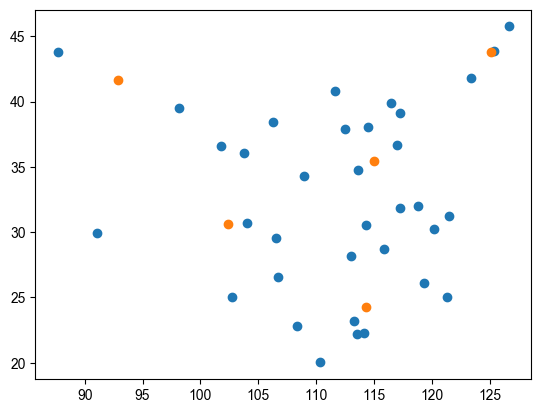

In [38]:
plt.scatter(all_x, all_y)
#plt.scatter([x for x,y in centers.values()], [y for x,y in centers.values()])
plt.scatter(*zip(*centers.values()))

In [39]:
city_location_with_station = {
    '能源站-{}'.format(int(i) + 1): position for i, position in centers.items()
}

In [40]:
city_location_with_station

{'能源站-2': array([102.37428571,  30.63285714]),
 '能源站-3': array([114.34555556,  24.27666667]),
 '能源站-4': array([125.12,  43.81]),
 '能源站-5': array([92.925, 41.62 ]),
 '能源站-6': array([115.01571429,  35.41571429])}

In [41]:
def draw_cities(cities, color=None):
    city_graph = nx.Graph()
    city_graph.add_nodes_from(list(cities.keys()))
    nx.draw(city_graph, cities, node_color=color, with_labels=True, node_size=30)

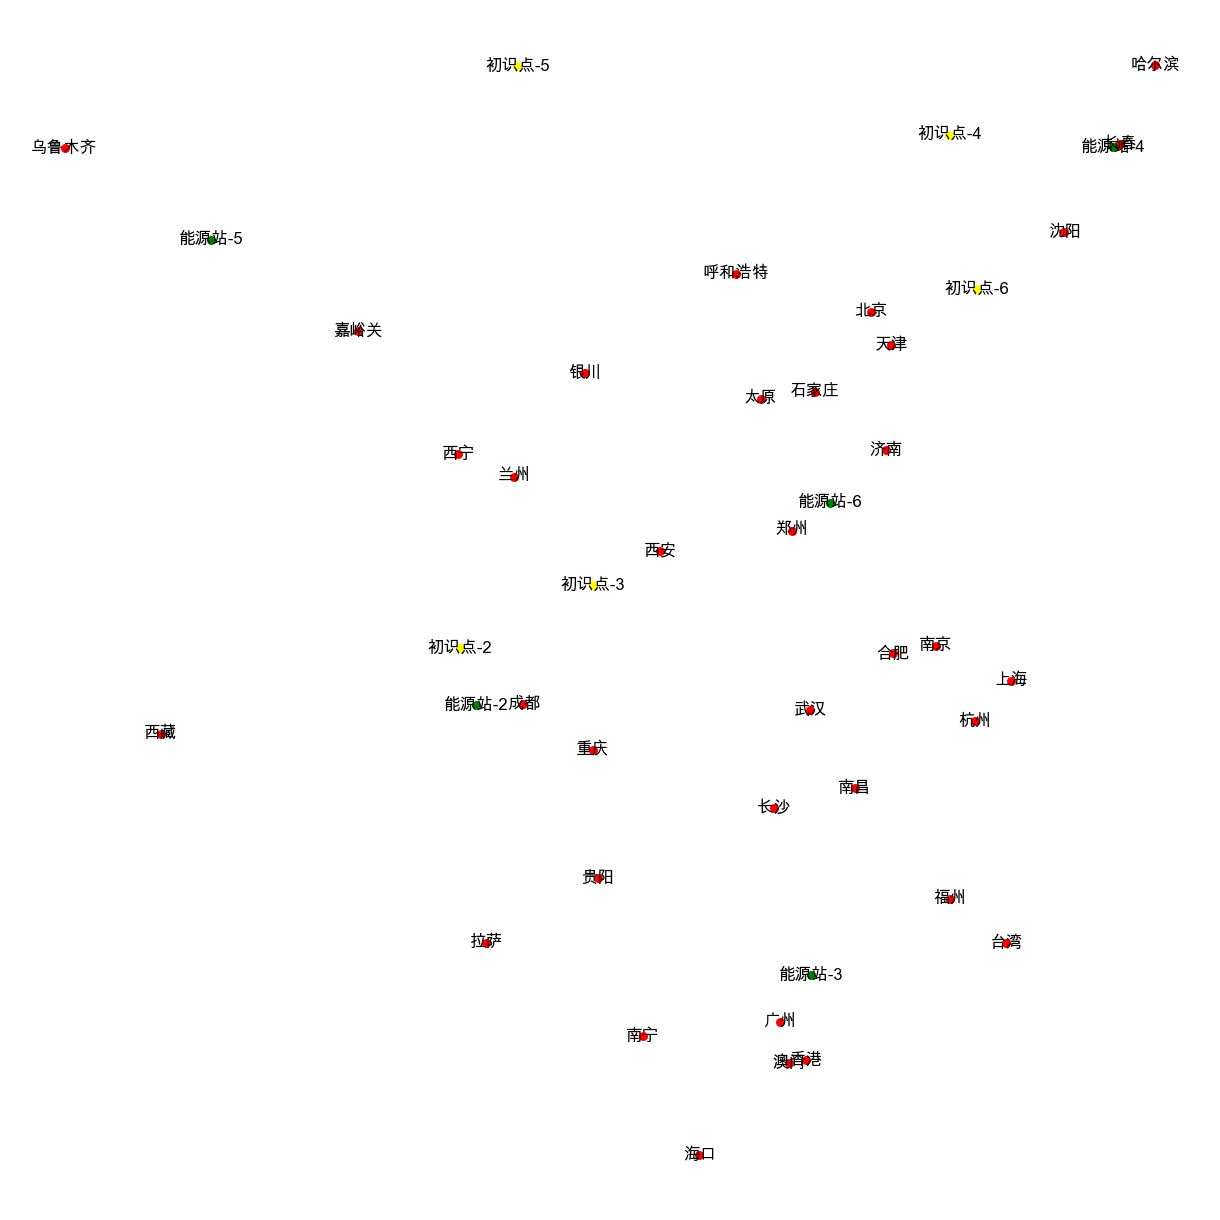

In [44]:
plt.figure(1, figsize=(12, 12))
draw_cities({'初识点-{}'.format(int(i)+1): p for i,p in the_first_center.items()}, color='yellow')  
draw_cities(city_location_with_station, color='green')
draw_cities(city_location, color='red')

In [43]:
centers

{'1': array([102.37428571,  30.63285714]),
 '2': array([114.34555556,  24.27666667]),
 '3': array([125.12,  43.81]),
 '4': array([92.925, 41.62 ]),
 '5': array([115.01571429,  35.41571429])}

## sklearn

 https://scikit-learn.org

In [45]:
from sklearn.cluster import KMeans

In [46]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(Xs)

/Users/bjhl/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
kmeans.cluster_centers_

array([[117.94666667,  29.32222222],
       [ 94.675     ,  37.4425    ],
       [108.85111111,  24.70666667],
       [125.12      ,  43.81      ],
       [112.192     ,  37.595     ]])

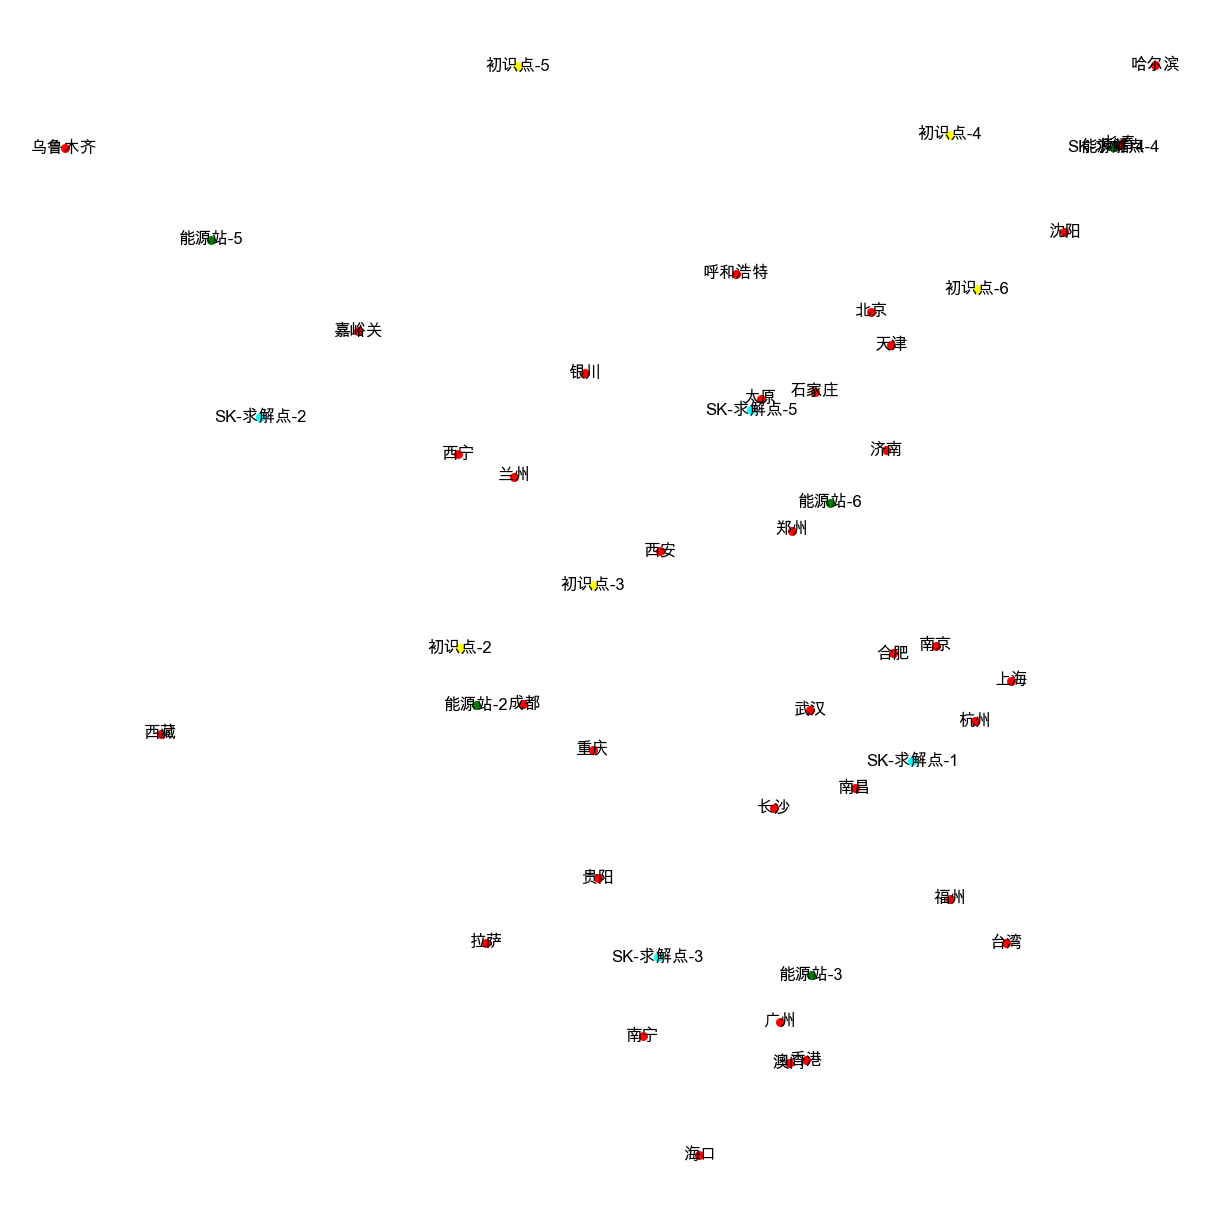

In [48]:
plt.figure(1, figsize=(12, 12))
draw_cities({'初识点-{}'.format(int(i)+1): p for i,p in the_first_center.items()}, color='yellow')  
draw_cities({'SK-求解点-{}'.format(int(i)+1): p for i,p in enumerate(kmeans.cluster_centers_)}, color='cyan')  
draw_cities(city_location_with_station, color='green')
draw_cities(city_location, color='red')